In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

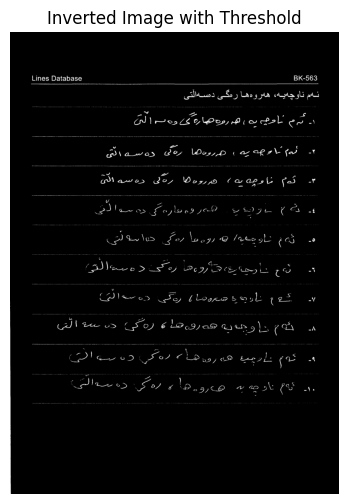

In [139]:

image_path = 'image-samples/input/sample/page_2_gray.png'   
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.title('Inverted Image with Threshold')
plt.show()

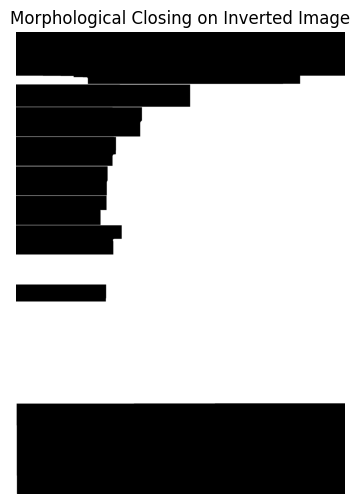

In [140]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1250, 100))  # Width: 30, Height: 3

closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 6))
plt.imshow(closed_image, cmap='gray')
plt.axis('off')  # Hide axis
plt.title('Morphological Closing on Inverted Image')
plt.show()


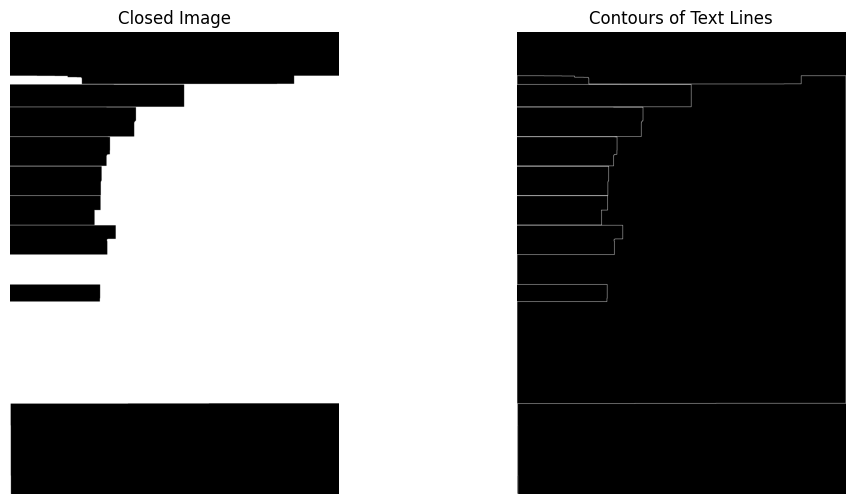

In [143]:
contour_image = np.zeros_like(closed_image)

cv2.drawContours(contour_image, contours, -1, (255), thickness=2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(closed_image, cmap='gray')
plt.axis('off') 
plt.title('Closed Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.axis('off') 
plt.title('Contours of Text Lines')

plt.show()


Number of contours detected: 1


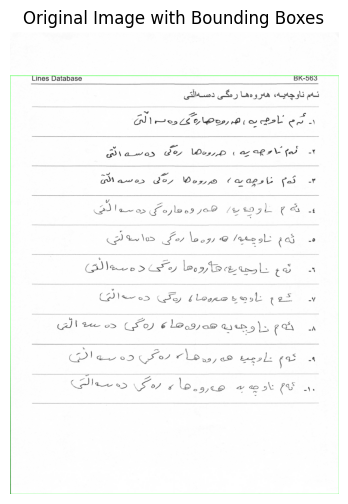

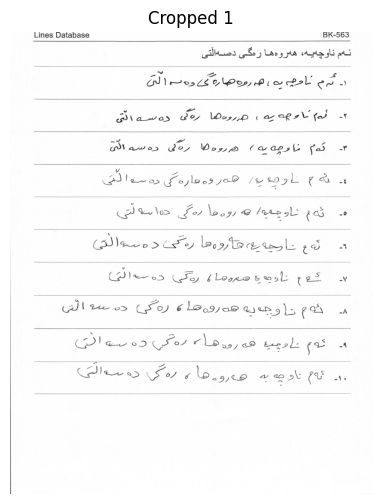

In [144]:
original_image = cv2.imread(image_path)

cropped_images = []

image_with_bboxes = original_image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = original_image[y:y+h, x:x+w]
    cropped_images.append(cropped_image)

    cv2.rectangle(image_with_bboxes, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

print(f'Number of contours detected: {len(contours)}')

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.title('Original Image with Bounding Boxes')
plt.show()

plt.figure(figsize=(12, 6))

for i, cropped in enumerate(cropped_images):
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.title(f'Cropped {i+1}')

plt.show()